In [1]:
import pandas as pd
medicare = pd.read_csv("/netapp2/home/se197/RPDR/Josh Lin/3_EHR_V2/CMS/Data/final_medicare.csv")

In [2]:
medicare = medicare[(medicare.Co_CAD_R0 == 1) | (medicare.Co_Diabetes_R0 == 1) | (medicare.Co_CAD_R0 == 1) | 
                    (medicare.Co_Embolism_R0 == 1) | (medicare.Co_DVT_R0 == 1) | (medicare.Co_PE_R0 == 1) | 
                    (medicare.Co_AFib_R0 == 1) | (medicare.Co_HF_R0 == 1) | (medicare.Co_HemoStroke_R0 == 1) | 
                    (medicare.Co_IscheStroke_R0 == 1) | (medicare.Co_OthStroke_R0 == 1) |(medicare.Co_TIA_R0 == 1)
                    | (medicare.Co_OldMI_R0 == 1) | (medicare.Co_AcuteMI_R0 == 1) | (medicare.Co_PVD_R0 == 1)]
medicare.shape

(52277, 281)

In [6]:
train_set = medicare[medicare.Hospital != 'BWH'] # MGH; n = 204014
validation_set = medicare[medicare.Hospital == 'BWH'] # BWH and Neither; n = 115726
import numpy as np

fifty_perc_EHR_cont = np.percentile(medicare['Cal_MPEC_R0'],50)
train_set_high = train_set[train_set.Cal_MPEC_R0 >= fifty_perc_EHR_cont]
train_set_low= train_set[train_set.Cal_MPEC_R0 < fifty_perc_EHR_cont]

validation_set_high = validation_set[validation_set.Cal_MPEC_R0 >= fifty_perc_EHR_cont]
validation_set_low = validation_set[validation_set.Cal_MPEC_R0 < fifty_perc_EHR_cont]


In [7]:
predictor_variable = [
        'Co_CAD_R0', 'Co_Embolism_R0', 'Co_DVT_R0', 'Co_PE_R0', 'Co_AFib_R0',
        'Co_Hypertension_R0', 'Co_Hyperlipidemia_R0', 'Co_Atherosclerosis_R0',
        'Co_HF_R0', 'Co_HemoStroke_R0', 'Co_IscheStroke_R0', 'Co_OthStroke_R0',
        'Co_TIA_R0', 'Co_COPD_R0', 'Co_Asthma_R0', 'Co_Pneumonia_R0', 'Co_Alcoholabuse_R0',
        'Co_Drugabuse_R0', 'Co_Epilepsy_R0', 'Co_Cancer_R0', 'Co_MorbidObesity_R0',
        'Co_Dementia_R0', 'Co_Depression_R0', 'Co_Bipolar_R0', 'Co_Psychosis_R0',
        'Co_Personalitydisorder_R0', 'Co_Adjustmentdisorder_R0', 'Co_Anxiety_R0',
        'Co_Generalizedanxiety_R0', 'Co_OldMI_R0', 'Co_AcuteMI_R0', 'Co_PUD_R0',
        'Co_UpperGIbleed_R0', 'Co_LowerGIbleed_R0', 'Co_Urogenitalbleed_R0',
        'Co_Othbleed_R0', 'Co_PVD_R0', 'Co_LiverDisease_R0', 'Co_MRI_R0',
        'Co_ESRD_R0', 'Co_Obesity_R0', 'Co_Sepsis_R0', 'Co_Osteoarthritis_R0',
        'Co_RA_R0', 'Co_NeuroPain_R0', 'Co_NeckPain_R0', 'Co_OthArthritis_R0',
        'Co_Osteoporosis_R0', 'Co_Fibromyalgia_R0', 'Co_Migraine_R0', 'Co_Headache_R0',
        'Co_OthPain_R0', 'Co_GeneralizedPain_R0', 'Co_PainDisorder_R0',
        'Co_Falls_R0', 'Co_CoagulationDisorder_R0', 'Co_WhiteBloodCell_R0', 'Co_Parkinson_R0',
        'Co_Anemia_R0', 'Co_UrinaryIncontinence_R0', 'Co_DecubitusUlcer_R0',
        'Co_Oxygen_R0', 'Co_Mammography_R0', 'Co_PapTest_R0', 'Co_PSATest_R0',
        'Co_Colonoscopy_R0', 'Co_FecalOccultTest_R0', 'Co_FluShot_R0', 'Co_PneumococcalVaccine_R0', 'Co_RenalDysfunction_R0', 'Co_Valvular_R0', 'Co_Hosp_Prior30Days_R0',
        'Co_RX_Antibiotic_R0', 'Co_RX_Corticosteroid_R0', 'Co_RX_Aspirin_R0', 'Co_RX_Dipyridamole_R0',
        'Co_RX_Clopidogrel_R0', 'Co_RX_Prasugrel_R0', 'Co_RX_Cilostazol_R0', 'Co_RX_Ticlopidine_R0',
        'Co_RX_Ticagrelor_R0', 'Co_RX_OthAntiplatelet_R0', 'Co_RX_NSAIDs_R0',
        'Co_RX_Opioid_R0', 'Co_RX_Antidepressant_R0', 'Co_RX_AAntipsychotic_R0', 'Co_RX_TAntipsychotic_R0',
        'Co_RX_Anticonvulsant_R0', 'Co_RX_PPI_R0', 'Co_RX_H2Receptor_R0', 'Co_RX_OthGastro_R0',
        'Co_RX_ACE_R0', 'Co_RX_ARB_R0', 'Co_RX_BBlocker_R0', 'Co_RX_CCB_R0', 'Co_RX_Thiazide_R0',
        'Co_RX_Loop_R0', 'Co_RX_Potassium_R0', 'Co_RX_Nitrates_R0', 'Co_RX_Aliskiren_R0',
        'Co_RX_OthAntihypertensive_R0', 'Co_RX_Antiarrhythmic_R0', 'Co_RX_OthAnticoagulant_R0',
        'Co_RX_Insulin_R0', 'Co_RX_Noninsulin_R0', 'Co_RX_Digoxin_R0', 'Co_RX_Statin_R0',
        'Co_RX_Lipid_R0', 'Co_RX_Lithium_R0', 'Co_RX_Benzo_R0', 'Co_RX_ZDrugs_R0',
        'Co_RX_OthAnxiolytic_R0', 'Co_RX_Dementia_R0', 'Co_RX_Hormone_R0',
        'Co_RX_Osteoporosis_R0', 'Co_N_Drugs_R0', 'Co_N_Hosp_R0', 'Co_Total_HospLOS_R0',
        'Co_N_MDVisit_R0', 'Co_RX_AnyAspirin_R0', 'Co_RX_AspirinMono_R0', 'Co_RX_ClopidogrelMono_R0',
        'Co_RX_AspirinClopidogrel_R0', 'Co_RX_DM_R0', 'Co_RX_Antipsychotic_R0'
]

co_train_gpop = train_set[predictor_variable]
co_train_high = train_set_high[predictor_variable]
co_train_low = train_set_low[predictor_variable]

co_validation_gpop = validation_set[predictor_variable]
co_validation_high = validation_set_high[predictor_variable]
co_validation_low = validation_set_low[predictor_variable]

In [8]:
out_train_hemorrhage_gpop = train_set['Out_Hemorrhage_RC1']
out_train_hemorrhage_high = train_set_high['Out_Hemorrhage_RC1']
out_train_hemorrhage_low = train_set_low['Out_Hemorrhage_RC1']

out_validation_hemorrhage_gpop = validation_set['Out_Hemorrhage_RC1']
out_validation_hemorrhage_high = validation_set_high['Out_Hemorrhage_RC1']
out_validation_hemorrhage_low = validation_set_low['Out_Hemorrhage_RC1']

# Template LR 

In [9]:
def lr(X_train, y_train):
    from sklearn.linear_model import Lasso
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler 

    model = LogisticRegression()
    param_grid = [
        {'C' : np.logspace(-4, 4, 20)}
        ]
    clf = GridSearchCV(model, param_grid, cv = 5, verbose = True, n_jobs = -1)
    best_clf = clf.fit(X_train, y_train)
    return best_clf

In [10]:
def scores(X_train,y_train):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import fbeta_score
    from sklearn.metrics import roc_auc_score 
    from sklearn.metrics import log_loss

    pred = best_clf.predict(X_train)
    actual = y_train
    print(accuracy_score(actual,pred))
    print(f1_score(actual,pred))
    print(fbeta_score(actual,pred, average = 'macro', beta = 2))
    print(roc_auc_score(actual, best_clf.predict_proba(X_train)[:,1]))
    print(log_loss(actual,best_clf.predict_proba(X_train)[:,1]))
    
    


In [11]:
def cross_val(X,y):
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_validate
    from sklearn.metrics import log_loss
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import fbeta_score
    import sklearn
    import numpy as np
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    log_loss = [] 
    auc = [] 
    accuracy = [] 
    f1 = [] 
    f2 = [] 
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model = lr(X_train, y_train)
        prob = model.predict_proba(X_test)[:,1] # prob is a vector of probabilities 
        print(prob)
        pred = np.round(prob) # pred is the rounded predictions 
        
        log_loss.append(sklearn.metrics.log_loss(y_test, prob))
        auc.append(sklearn.metrics.roc_auc_score(y_test, prob))
        accuracy.append(sklearn.metrics.accuracy_score(y_test, pred))
        f1.append(sklearn.metrics.f1_score(y_test, pred, average = 'macro'))
        f2.append(fbeta_score(y_test,pred, average = 'macro', beta = 2))
    print(np.mean(accuracy))
    print(np.mean(f1))
    print(np.mean(f2))
    print(np.mean(auc))
    print(np.mean(log_loss))

# General Population

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
co_train_gpop_sm,out_train_hemorrhage_gpop_sm = sm.fit_resample(co_train_gpop,out_train_hemorrhage_gpop)

best_clf = lr(co_train_gpop_sm, out_train_hemorrhage_gpop_sm)

#scores(co_train_gpop_sm, out_train_hemorrhage_gpop_sm)

print()

#scores(co_train_gpop, out_train_hemorrhage_gpop)

print()

#scores(co_validation_gpop, out_validation_hemorrhage_gpop)

comb = [] 
#for i in range(len(predictor_variable)):
    #comb.append(predictor_variable[i] + str(best_clf.best_estimator_.coef_[:,i:i+1]))
#comb

Fitting 5 folds for each of 20 candidates, totalling 100 fits




/PHShome/se197/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# High Continuity 

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
co_train_high_sm,out_train_hemorrhage_high_sm = sm.fit_resample(co_train_high,out_train_hemorrhage_high)

best_clf = lr(co_train_high_sm, out_train_hemorrhage_high_sm)
prediction_high = best_clf.predict_proba(co_validation_high)
#predictions_high_low = best_clf.predict_proba(co_validation_low)
#predictions_high_high = best_clf.predict_proba(co_validation_high)
#prediction_high_gpop = best_clf.predict_proba(co_validation_gpop)
#h_pred = best_clf.predict_proba(co_validation_high)[:,1]
#scores(co_train_high_sm, out_train_hemorrhage_high_sm)

#print()

#scores(co_train_high, out_train_hemorrhage_high)

#print()

#scores(co_validation_high, out_validation_hemorrhage_high)

#comb = [] 
#for i in range(len(predictor_variable)):
    #comb.append(predictor_variable[i] + str(best_clf.best_estimator_.coef_[:,i:i+1]))
#comb

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/PHShome/se197/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
for values in prediction_high:
    print(values[1])

0.36685863448996414
0.28105217753085454
0.2769687896080815
0.5606666300660784
0.36867211456252313
0.5861818871175176
0.2892495999796421
0.2231627497065347
0.44211923658165736
0.3427197237199845
0.10273739674123473
0.46523620636471646
0.5818959050831629
0.6518868937171195
0.5238672705650343
0.40300203466779383
0.4405243692387226
0.6758181992098848
0.5225360635210154
0.6969402529264664
0.8407892157456921
0.6100228554286345
0.27895613360520766
0.22869483993709191
0.19147747492584064
0.5622538177212106
0.434002812292417
0.21846777823143915
0.3994842940831811
0.2617010425964171
0.32335994134012336
0.3461645912461212
0.21997416672590378
0.3247679564427875
0.626025189664291
0.37341713643578744
0.22630074631413527
0.6630773900037888
0.4847203303495056
0.28154188327191465
0.11025835432301034
0.23625808318634106
0.3705068840295841
0.5304327586978733
0.26744569116527417
0.44963369193730995
0.6802224853109363
0.35763360721556364
0.24984405117986802
0.47024770514755865
0.5419931551285634
0.38255010

0.2851887927723174
0.2022274504837617
0.7511639447855085
0.18355112971532886
0.5250179982632723
0.36883505410461564
0.4257009247421769
0.546188079562189
0.21282377671837382
0.32676793553031047
0.13851652600933698
0.3588979582654366
0.6538445379416922
0.29757293660205325
0.8248194809024335
0.4856352455489112
0.43913328986773253
0.3369251813878454
0.6377755439920263
0.741163525917473
0.21257689222226894
0.2564759546216255
0.2321214753147487
0.519582685023891
0.7464837904170888
0.37554307704181766
0.6950116561718029
0.29131372732236743
0.745064046138196
0.5795183222101736
0.40749787736676574
0.7868312570229568
0.5642105908584732
0.3218889119974379
0.35577138401113256
0.5636684728285982
0.3741080046010155
0.30379721298202483
0.9134992053827217
0.6299590732669043
0.541824890767566
0.6534065019200295
0.4748866532473045
0.23892984673958031
0.7031398846585034
0.19759755835696038
0.5297955689085301
0.3465565031772728
0.3314794478467204
0.1199388247293589
0.43490211677211094
0.6234452093379007
0

0.9005682965227927
0.3528802539249362
0.3571746525164638
0.5342837446343979
0.6898126924408685
0.18963869705099173
0.3027527528545185
0.8076231979549984
0.40333150320474276
0.22199131856134163
0.1399612447104699
0.48422572992951934
0.34584882398262334
0.39423705812137533
0.21585688224707272
0.45100829745768223
0.6849748087749549
0.6835268034727038
0.5104044758685872
0.07644888349478528
0.2638054351644469
0.5086223729580515
0.7496275330721786
0.5219581707621864
0.2731326316413457
0.3293584965382843
0.5533648419760989
0.8014151043400841
0.7091401203094734
0.390050194662105
0.6273491713122558
0.5551520923394241
0.4691065427438375
0.22784281837298592
0.393700690619505
0.09160501113784442
0.38920455775278884
0.22564421110029798
0.5106423908937751
0.6051964919466848
0.4251603949931792
0.42646524268580055
0.2610699397843081
0.29996738388724165
0.2095872633732237
0.36597929122247325
0.576532840996611
0.2609993802544576
0.24651817483359587
0.7583626254661069
0.4215351701214613
0.528607181564586

0.6861818492209961
0.16975472851261483
0.4896207634020668
0.2462878420925129
0.44601112110666874
0.6314324354180658
0.19201176447210305
0.22952628460768176
0.542133112450198
0.1255889512746614
0.23027162233046777
0.28796994413143734
0.1505265028108321
0.8656888550694393
0.2931456806842115
0.5731082199156617
0.2730344501538356
0.5032761172889635
0.1724716112183354
0.5980656762300949
0.2435273335279936
0.7066207106376395
0.29577734252824756
0.598884816002122
0.882724859759468
0.4415773241950676
0.3652286545865029
0.6741333963553913
0.5276078336685605
0.4482485969203892
0.28806692687502394
0.8092472064494413
0.7855855811625749
0.404424773609387
0.3517332499896341
0.6531126833153071
0.3855611398360577
0.5583836579816917
0.3796388347954583
0.4927114023234544
0.35285147902018693
0.3855075128509097
0.2714953010171111
0.33740319477010344
0.22737991359478607
0.24682679739608254
0.4279890821097849
0.5342639820075052
0.28633779846796137
0.7716495044031759
0.5417831149440571
0.20979931560347234
0.

0.5132819070474989
0.5680024990076987
0.519019936410789
0.4535492298150065
0.117560753472999
0.7885187527683917
0.726806728501447
0.3282694521851585
0.30800037123804586
0.10460329193516639
0.8011792168192367
0.26145217246040314
0.35699369909925355
0.5308404807479997
0.6334087200006007
0.17105317930441993
0.5378919196183317
0.6032582863924261
0.18806473955255965
0.4442845022765924
0.42583626415257575
0.24566502794959752
0.2105725031004902
0.6162057883077688
0.10755521840207656
0.34524268547480125
0.38218959629308824
0.6332664180252304
0.7031578327757071
0.634449286219755
0.6668144229886454
0.5913190168573507
0.43706284449678584
0.27751930246127915
0.2905586352347506
0.35600778709952585
0.14085245288847692
0.07947422138327576
0.43792898296523736
0.337138537633777
0.3765830760212384
0.4353741374731907
0.8180670124898354
0.1587161928808121
0.13733597908299688
0.24519332997222126
0.23113344962985677
0.41714256962048
0.4431391477087388
0.5080208375380042
0.2993587599933793
0.2373715109272265

0.9499541350883235
0.8285941322062127
0.11655510710180743
0.25310897058299603
0.2626483672726574
0.410870121133883
0.3735194370909942
0.09930335525049888
0.25088759995825305
0.3813703061192172
0.22089387323774362
0.2588970962860377
0.21888081075960938
0.14687376943460695
0.5036791480071864
0.31209207330265354
0.5273189060360102
0.43600546323387
0.4307373693484694
0.20900658312393205
0.6396687648218813
0.3125216103540233
0.5583542232313312
0.9627715717642035
0.29366535664600296
0.3134651096689796
0.3046542647757942
0.3802057526661493
0.6081583684511196
0.2953442288669438
0.20246468314964916
0.31144957070655727
0.4546622907003934
0.39247941637624617
0.32297558858527825
0.18698944531937992
0.5088095059642359
0.20565896196691927
0.29754598753582717
0.12559871302261053
0.22323666644291926
0.7334908113934968
0.2020719953880808
0.15142057387639096
0.18081710928709654
0.2731490098209584
0.368535079945789
0.21507202069044287
0.6731548670122182
0.21704156478511805
0.11589551480575201
0.212188322

0.867845251834495
0.13124075825857254
0.27146506713766555
0.3540613310686989
0.8176040629339963
0.2422089025117825
0.15488027438527818
0.3070816763525191
0.8747921020037117
0.7469210676701543
0.16176560341680088
0.4208283099410148
0.6293744089611722
0.25381106753601085
0.5029933690645253
0.4593229865078217
0.1482940929520484
0.5313761508271969
0.23221503627910953
0.28292525764122994
0.3671913398511072
0.3949843361609013
0.33120619820549413
0.5857964321832967
0.15854256377088347
0.213534900604644
0.166870944638446
0.3924509615123619
0.4985882076967532
0.5302841694124809
0.5470980308684723
0.4405445223810937
0.21589981040821607
0.39066421099378984
0.9318266110964476
0.26736891568504456
0.2690136399474518
0.41959086564239806
0.34858173549476507
0.32998572122870534
0.1876903141588946
0.5787641749239548
0.6097684000658733
0.3414293320255867
0.39584601433894706
0.15894809318165581
0.40683184052322546
0.5141431411123777
0.08794967245587418
0.3805246959280763
0.45688879307326724
0.584043893985

In [16]:
import sklearn
print(sklearn.metrics.roc_auc_score(out_validation_hemorrhage_high,prediction_high[:,1]))

0.7160705692778244


# Low Continuity

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
co_train_low_sm,out_train_hemorrhage_low_sm = sm.fit_resample(co_train_low,out_train_hemorrhage_low)

best_clf = lr(co_train_low_sm, out_train_hemorrhage_low_sm)

scores(co_train_low_sm, out_train_hemorrhage_low_sm)

print()

scores(co_train_low, out_train_hemorrhage_low)

print()

scores(co_validation_low, out_validation_hemorrhage_low)

comb = [] 
for i in range(len(predictor_variable)):
    comb.append(predictor_variable[i] + str(best_clf.best_estimator_.coef_[:,i:i+1]))
comb

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/PHShome/se197/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6487553342816501
0.6472625977643655
0.6487500297342159
0.69765230904334
0.6339180494759058

0.6477971145759203
0.23410241980866628
0.5319260228846425
0.6665337529821576
0.6350055281692892

0.5751097537698034
0.22303664921465968
0.487247659556842
0.596301395731917
0.7218961426728687


['Co_CAD_R0[[0.65997975]]',
 'Co_Embolism_R0[[0.30283686]]',
 'Co_DVT_R0[[-0.0410153]]',
 'Co_PE_R0[[-0.22277151]]',
 'Co_AFib_R0[[0.32495825]]',
 'Co_Hypertension_R0[[-0.07954155]]',
 'Co_Hyperlipidemia_R0[[-0.42726694]]',
 'Co_Atherosclerosis_R0[[-0.23513266]]',
 'Co_HF_R0[[0.01927078]]',
 'Co_HemoStroke_R0[[-0.62797992]]',
 'Co_IscheStroke_R0[[-0.02777389]]',
 'Co_OthStroke_R0[[-0.05858435]]',
 'Co_TIA_R0[[-0.24508579]]',
 'Co_COPD_R0[[-0.20798282]]',
 'Co_Asthma_R0[[0.19268699]]',
 'Co_Pneumonia_R0[[-0.23354234]]',
 'Co_Alcoholabuse_R0[[-0.03140694]]',
 'Co_Drugabuse_R0[[-0.46220916]]',
 'Co_Epilepsy_R0[[0.34325373]]',
 'Co_Cancer_R0[[-0.14107069]]',
 'Co_MorbidObesity_R0[[0.09403066]]',
 'Co_Dementia_R0[[-0.35625403]]',
 'Co_Depression_R0[[-0.18554768]]',
 'Co_Bipolar_R0[[0.1826513]]',
 'Co_Psychosis_R0[[-0.60919297]]',
 'Co_Personalitydisorder_R0[[0.19185133]]',
 'Co_Adjustmentdisorder_R0[[-0.14103124]]',
 'Co_Anxiety_R0[[0.02561672]]',
 'Co_Generalizedanxiety_R0[[-0.12442681]]',

In [11]:
for values in predictions_high_high:
    print(values[1])

0.36685863448996414
0.28105217753085454
0.2769687896080815
0.5606666300660784
0.36867211456252313
0.5861818871175176
0.2892495999796421
0.2231627497065347
0.44211923658165736
0.3427197237199845
0.10273739674123473
0.46523620636471646
0.5818959050831629
0.6518868937171195
0.5238672705650343
0.40300203466779383
0.4405243692387226
0.6758181992098848
0.5225360635210154
0.6969402529264664
0.8407892157456921
0.6100228554286345
0.27895613360520766
0.22869483993709191
0.19147747492584064
0.5622538177212106
0.434002812292417
0.21846777823143915
0.3994842940831811
0.2617010425964171
0.32335994134012336
0.3461645912461212
0.21997416672590378
0.3247679564427875
0.626025189664291
0.37341713643578744
0.22630074631413527
0.6630773900037888
0.4847203303495056
0.28154188327191465
0.11025835432301034
0.23625808318634106
0.3705068840295841
0.5304327586978733
0.26744569116527417
0.44963369193730995
0.6802224853109363
0.35763360721556364
0.24984405117986802
0.47024770514755865
0.5419931551285634
0.38255010

0.24914857577172433
0.19172678553150851
0.348757831176789
0.13962135906991704
0.3444816091690745
0.5492230093503089
0.31429698202860523
0.2670036182399795
0.3759509066566684
0.2590460202678946
0.06973636737610102
0.2567245201747444
0.3560869275147669
0.3945518980333678
0.7834771081710863
0.6148561182820961
0.35784589720396354
0.3565625511733225
0.6071625950568036
0.5327473404133536
0.3669484954157972
0.1340487617333
0.21799591421496328
0.41833202779346296
0.6237785378272664
0.5067672831199301
0.826460283611617
0.2911013925400585
0.32408449856061944
0.5216911274443199
0.5105773497579945
0.1569610460708775
0.2402134360504174
0.5925019943191752
0.8370383341118088
0.9436352490654835
0.25179735757409966
0.15681790842995746
0.132942289164093
0.39192091224353176
0.34080629751709246
0.5804023874238168
0.06983578886469659
0.34652337018022306
0.37343532580869465
0.03744032838550637
0.2842704956177511
0.38821688499511137
0.39461605676131956
0.27801210130035875
0.33056766112808667
0.52024463634250

0.40333150320474276
0.22199131856134163
0.1399612447104699
0.48422572992951934
0.34584882398262334
0.39423705812137533
0.21585688224707272
0.45100829745768223
0.6849748087749549
0.6835268034727038
0.5104044758685872
0.07644888349478528
0.2638054351644469
0.5086223729580515
0.7496275330721786
0.5219581707621864
0.2731326316413457
0.3293584965382843
0.5533648419760989
0.8014151043400841
0.7091401203094734
0.390050194662105
0.6273491713122558
0.5551520923394241
0.4691065427438375
0.22784281837298592
0.393700690619505
0.09160501113784442
0.38920455775278884
0.22564421110029798
0.5106423908937751
0.6051964919466848
0.4251603949931792
0.42646524268580055
0.2610699397843081
0.29996738388724165
0.2095872633732237
0.36597929122247325
0.576532840996611
0.2609993802544576
0.24651817483359587
0.7583626254661069
0.4215351701214613
0.528607181564586
0.5072572855144065
0.7924036379376231
0.2967833767030026
0.6877029267128837
0.4912948504844938
0.6592996135049444
0.5977062906731945
0.3368235066481205


0.34911847107782323
0.4344306920992408
0.36963860335818244
0.43549134770322706
0.3199360585488715
0.4462427973032891
0.800259637459282
0.3323604624009837
0.4320055573837817
0.5112029144669022
0.3262926310348857
0.40300371800475765
0.3505483940572583
0.4682541351514441
0.28310900051157345
0.2437457014744596
0.24462542402497822
0.45708053144453337
0.45116599693369736
0.8754670554925533
0.4750386147982429
0.6364092535850764
0.38550900649505077
0.5530700440597177
0.5531005707098599
0.40096491369170406
0.396680381611821
0.8068332735785821
0.575351506383355
0.31477555740381513
0.26465091378897804
0.6853600104882551
0.35539364508142707
0.5977463299657904
0.3424949124986278
0.30384946882728553
0.7318420070684056
0.28434162884916675
0.36004396935059385
0.34981564720452557
0.30898783493497994
0.6394265785006941
0.5134717913783196
0.22641814332408286
0.47389859874317225
0.5770167148222537
0.5411322652210278
0.2822016828662584
0.5114429565557559
0.23610419239044095
0.9404462353943102
0.40465617529

0.21647612592339907
0.5510609842048226
0.1507145000073656
0.6104136653297815
0.7445576567340558
0.1977843377013166
0.31572655573179287
0.5914877304005721
0.8000728179510435
0.6563662719741287
0.29503290369033525
0.4671531976973271
0.21608545279680633
0.2529770407447509
0.9331053130766909
0.8276120268292645
0.53981935781555
0.7452191861601379
0.49063006698884926
0.1849250457079721
0.5394440984242941
0.6701191328121943
0.8154739432453206
0.4021290567290696
0.2640291360832146
0.7417466841044276
0.2997509738850946
0.3246184511767949
0.4150306109133507
0.38030834913055184
0.6713167982900042
0.11467749435073478
0.35632830441164126
0.7023520880548074
0.47999302214629486
0.4256816932427757
0.3187300297535896
0.2498158370762492
0.38053624431265215
0.8656446367528764
0.20642754413034672
0.502450913873927
0.4023238862978684
0.13802975412700358
0.6790094102827696
0.14735421127045975
0.40784114908834657
0.37051020118884853
0.2092004559682156
0.1318099710373836
0.6128106022961001
0.3187348677388202


0.44144582667657467
0.4916230789256761
0.36542938927929436
0.433338351283038
0.6866885720277636
0.3379209324597036
0.5275354737163359
0.6475757042754294
0.201445987169471
0.14993855616627924
0.2211832389280925
0.6227496041493985
0.38488514009072133
0.13319774843389928
0.32466015593453607
0.23134419326297448
0.7500615448430895
0.32011022333542993
0.2574844158297572
0.49223323470505703
0.8475551524262714
0.29876981835065436
0.4232853759846291
0.7998997887615449
0.8644790553428063
0.38629265880125274
0.5782538455583189
0.35325281233392203
0.4179623468326084
0.9455805814255638
0.5510462577351158
0.15068271889032572
0.42068448723763396
0.22626916800571492
0.6410484949168781
0.7157202856709054
0.5211620418378593
0.8001490535398604
0.22645733968480472
0.1742673457354814
0.30699920120370905
0.6095223737050081
0.22959155444635262
0.8190278361099459
0.5243740114487031
0.14485875929550196
0.44881829406936713
0.25102756433780626
0.14909462906867568
0.6219235289023157
0.7410893084648569
0.287406766

0.5606236706496099
0.5246778447357948
0.6517308326791023
0.7845833681360644
0.2411622279467389
0.6884007143476844
0.3732104552784649
0.618606858543967
0.37069089556576423
0.6489565095342016
0.5769979111285931
0.41037645148498214
0.1757417295660165
0.7482664779171991
0.46755064228542037
0.5057877555092066
0.2879181716473326
0.890521631464265
0.657430833699835
0.39944286760321046
0.1959744974062676
0.5826098850925074
0.06809984946527985
0.3717937952430813
0.2961751690047978
0.4318335420223061
0.26187774898624355
0.20677120834689156
0.17900516261643748
0.22590894358202032
0.19391643157855928
0.20441998910112125
0.34327960715966455
0.23692577148071567
0.2595504713397795
0.15349422346684827
0.9206309415273305
0.36452412980528276
0.7259093517855723
0.4876426944526874
0.4731442475579817
0.3541983160574908
0.13238569030501665
0.2942888662051187
0.17736071034755446
0.34501251833435215
0.3087791163848364
0.08446438628556682
0.45585941414615355
0.4815761104513411
0.8553856509769024
0.400153421692

0.32044159246635123
0.2752532971609799
0.22747645814801531
0.30663375903829354
0.3643484915713588
0.4292310079625428
0.5802082277114561
0.434119184480531
0.562499837176132
0.543619768129566
0.48099164987990767
0.6102278385222991
0.45992349142032485
0.31997725240397584
0.38845297577660853
0.639305580026565
0.16814168409400415
0.2517616982479385
0.32385568052569813
0.5235659695986308
0.4675848392231938
0.2711167028156003
0.42664919692409586
0.6103763847812311
0.523027010633543
0.3211874579016595
0.7218211242188308
0.357169548200075
0.2315867768121087
0.5662709659260569
0.4367274831279438
0.17573582243808733
0.3007379486610345
0.3470770779537713
0.7064676978178495
0.2199937407919557
0.2066373990860984
0.1171560285985186
0.20628939368474236
0.38873164954216666
0.270364421567748
0.5635156081773056
0.1624001523732739
0.15584978122853582
0.28426323910953377
0.6067442238836703
0.49496492528449465
0.1873672060585142
0.23267071305580359
0.5354321147046599
0.8149278543725534
0.36292386324794473
0

0.43463591245483635
0.3076655156882788
0.228627921220035
0.8914065493736549
0.9682259207433765
0.587213308992105
0.8649667750999683
0.2748794899997831
0.14535551518059936
0.750215483912181
0.27362759220951144
0.34123446735311214
0.7230636685422465
0.6383300265036578
0.46582502521949354
0.2796602811652699
0.7283293190437213
0.5894565306523498
0.48644014403630087
0.28614121589366986
0.3191908063844849
0.7900708515744113
0.5387266177871725
0.9237754807473861
0.7111000679770892
0.14419216186010925
0.22431297554296398
0.39147960194289394
0.32978976304406415
0.35097693319266554
0.3098763312184404
0.5438400498416288
0.24694683071276752
0.1390572073351144
0.37430831174075946
0.2954838954380565
0.7452777894616613
0.30754930555759064
0.5933408419003031
0.3502476893973619
0.52968626786239
0.3283875241448839
0.4070581157914107
0.23628868518046203
0.336711463920325
0.2671310597958785
0.2642137871803152
0.18140356920666798
0.18989150841341512
0.7811388698932293
0.42736399291089344
0.3960154565945196

0.321911000154869
0.2551643940568081
0.12269820649926577
0.42224796290552175
0.25989879464384474
0.2758783566576134
0.12812041326255316
0.594037003890633
0.46952895862242255
0.3292449646232983
0.25706625805781175
0.2492801317017441
0.2905739143592107
0.22281866473096812
0.5123813255718884
0.3125289412041714
0.4634272515406802
0.15549437029848817
0.21983220400864956
0.7764015280991481
0.430223126364524
0.1671992401703273
0.34304224706932857
0.6566082010716249
0.4894550554262352
0.48029774087629823
0.14296236838841656
0.7425426654574004
0.6273978609443126
0.2171715856791718
0.3111810136266779
0.18143403148291362
0.16080959267016026
0.6577067460088676
0.30810140332645086
0.39617459423709006
0.28929592272075483
0.4426579507500014
0.24597136149726315
0.4206990558572154
0.28155088501756304
0.8466747335121737
0.3998080282161259
0.4423854150326385
0.5940309025895616
0.32332031694333757
0.584437396072492
0.26578826698501173
0.22493887111143643
0.3120916815444697
0.21423182828426318
0.1976826746

0.3520549487038625
0.14110177451947542
0.28432958176309747
0.8440657140170861
0.5069742275733422
0.14770852404304488
0.5176106773066367
0.4363518297594813
0.6504068700616681
0.22364975562379996
0.5501765278024968
0.8306865068127318
0.24455355276295127
0.26344980260947565
0.40467037230317643
0.27774998642581356
0.20379533528273386
0.4670484289643905
0.2672187067207213
0.6067251856416713
0.31722051832153975
0.6926630204766325
0.4445841621899707
0.4081865628204909
0.2560534908955322
0.8673313173393465
0.5829435360799662
0.6799940446173549
0.5166642372076306
0.6910898647645958
0.5886716347085063
0.6449422838460618
0.13498362966946842
0.46349068306044733
0.2809524107787681
0.5069224554253068
0.9279917940909863
0.5442368403955871
0.3561033592426728
0.5750786957616428
0.8058609845711998
0.23201008862357816
0.49162785983412244
0.21822563568794184
0.392959513421505
0.48779698385171344
0.5319726378125761
0.2653816286626438
0.9491287140285407
0.739418616372117
0.506533179576964
0.1480480404194641

In [12]:
import pandas as pd
import numpy as np
import scipy.stats

# AUC comparison adapted from
# https://github.com/Netflix/vmaf/
def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=np.float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=np.float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2


def fastDeLong(predictions_sorted_transposed, label_1_count):
    """
    The fast version of DeLong's method for computing the covariance of
    unadjusted AUC.
    Args:
       predictions_sorted_transposed: a 2D numpy.array[n_classifiers, n_examples]
          sorted such as the examples with label "1" are first
    Returns:
       (AUC value, DeLong covariance)
    Reference:
     @article{sun2014fast,
       title={Fast Implementation of DeLong's Algorithm for
              Comparing the Areas Under Correlated Receiver Operating Characteristic Curves},
       author={Xu Sun and Weichao Xu},
       journal={IEEE Signal Processing Letters},
       volume={21},
       number={11},
       pages={1389--1393},
       year={2014},
       publisher={IEEE}
     }
    """
    # Short variables are named as they are in the paper
    m = label_1_count
    n = predictions_sorted_transposed.shape[1] - m
    positive_examples = predictions_sorted_transposed[:, :m]
    negative_examples = predictions_sorted_transposed[:, m:]
    k = predictions_sorted_transposed.shape[0]

    tx = np.empty([k, m], dtype=np.float)
    ty = np.empty([k, n], dtype=np.float)
    tz = np.empty([k, m + n], dtype=np.float)
    for r in range(k):
        tx[r, :] = compute_midrank(positive_examples[r, :])
        ty[r, :] = compute_midrank(negative_examples[r, :])
        tz[r, :] = compute_midrank(predictions_sorted_transposed[r, :])
    aucs = tz[:, :m].sum(axis=1) / m / n - float(m + 1.0) / 2.0 / n
    v01 = (tz[:, :m] - tx[:, :]) / n
    v10 = 1.0 - (tz[:, m:] - ty[:, :]) / m
    sx = np.cov(v01)
    sy = np.cov(v10)
    delongcov = sx / m + sy / n
    return aucs, delongcov


def calc_pvalue(aucs, sigma):
    """Computes log(10) of p-values.
    Args:
       aucs: 1D array of AUCs
       sigma: AUC DeLong covariances
    Returns:
       log10(pvalue)
    """
    l = np.array([[1, -1]])
    z = np.abs(np.diff(aucs)) / np.sqrt(np.dot(np.dot(l, sigma), l.T))
    return np.log10(2) + scipy.stats.norm.logsf(z, loc=0, scale=1) / np.log(10)


def compute_ground_truth_statistics(ground_truth):
    assert np.array_equal(np.unique(ground_truth), [0, 1])
    order = (-ground_truth).argsort()
    label_1_count = int(ground_truth.sum())
    return order, label_1_count


def delong_roc_variance(ground_truth, predictions):
    """
    Computes ROC AUC variance for a single set of predictions
    Args:
       ground_truth: np.array of 0 and 1
       predictions: np.array of floats of the probability of being class 1
    """
    order, label_1_count = compute_ground_truth_statistics(ground_truth)
    predictions_sorted_transposed = predictions[np.newaxis, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)
    assert len(aucs) == 1, "There is a bug in the code, please forward this to the developers"
    return aucs[0], delongcov


def delong_roc_test(ground_truth, predictions_one, predictions_two):
    """
    Computes log(p-value) for hypothesis that two ROC AUCs are different
    Args:
       ground_truth: np.array of 0 and 1
       predictions_one: predictions of the first model,
          np.array of floats of the probability of being class 1
       predictions_two: predictions of the second model,
          np.array of floats of the probability of being class 1
    """
    order, label_1_count = compute_ground_truth_statistics(ground_truth)
    predictions_sorted_transposed = np.vstack((predictions_one, predictions_two))[:, order]
    aucs, delongcov = fastDeLong(predictions_sorted_transposed, label_1_count)
    return calc_pvalue(aucs, delongcov)


In [23]:
#print(10 ** delong_roc_test(out_validation_hemorrhage_gpop, l_pred, g_pred))
#print(10 ** delong_roc_test(out_validation_hemorrhage_gpop, h_pred, g_pred))
#print(10 ** delong_roc_test(out_validation_hemorrhage_gpop, l_pred, h_pred))

[[3.29014768e-19]]
[[1.20886893e-11]]
[[0.00858513]]


In [19]:
for values in predictions_high_low:
    print(values[1])

0.3955064259617502
0.3190551336941481
0.42488007742388906
0.4837017563812906
0.4986368291770763
0.41645899006400255
0.6882061286417587
0.6268730661146186
0.26789022625624737
0.5446709578255734
0.2849114604093668
0.7429370716493924
0.3215917350948715
0.4016081995567317
0.4162138544363346
0.25135416399502186
0.23372217427303585
0.43125096269554
0.44639065675887163
0.4419905981890716
0.47973481602463014
0.7929825519969513
0.5490727536332324
0.3354874911429094
0.38529978430868456
0.1775790629843808
0.38551935579456353
0.5561623188582375
0.47954995723866456
0.39251711937396644
0.5708900937974908
0.3634429531695942
0.44095325175138855
0.5882987948572607
0.45181493035005127
0.568711877237369
0.7271859683686462
0.4482443977555937
0.2759819449708162
0.3266501409259552
0.30546197276799264
0.43106427961537885
0.4738489546000084
0.23146768443050333
0.5985407442878838
0.43089185567060984
0.28155758233085154
0.4715036440047173
0.636237579098517
0.41069470258190804
0.21935245651506255
0.3755983315719

0.20956522687868914
0.3313465276538306
0.43044666617256155
0.6114244078173801
0.4132763218326585
0.41822037262908884
0.33317524254520364
0.3941957526394269
0.778526155350595
0.44095325175138855
0.25626417415397046
0.5457650497580555
0.5465167358023324
0.3116070625388049
0.44095325175138855
0.3956163938755077
0.20574157304709614
0.4058909614154376
0.32749013388199194
0.30312180805749167
0.24480937416942467
0.4072455265417585
0.4352174215413766
0.35837930915263233
0.4285144738094174
0.6058187144004853
0.24864673671319149
0.48954116260972286
0.44095325175138855
0.3329186105527837
0.44095325175138855
0.36144191862927433
0.5172667484211632
0.3587510681323444
0.39449473511511024
0.6818310587924356
0.35761265632278355
0.38486310449422634
0.4141614411299251
0.5762343672970929
0.4523677811325639
0.6639179218760694
0.4907943451955744
0.585284256074261
0.619538692462528
0.38669384649848565
0.44095325175138855
0.44095325175138855
0.35219613328645893
0.3794179006031131
0.4210050852682906
0.43546209

0.4397788894510101
0.470927541478872
0.752332323112866
0.49818805187563464
0.6479411308623486
0.5969332225439232
0.3999538803046574
0.43685790989647993
0.2451823383406742
0.8536864043540431
0.4252579697469582
0.5353841469583955
0.44095325175138855
0.522268418950938
0.255984967136032
0.4491675414764168
0.36504241438667245
0.24203782429764623
0.3667415409827932
0.5125674057183397
0.4450566440256261
0.409125739553151
0.2772900882230725
0.6277208135094932
0.4143107223890464
0.470927541478872
0.42505495056687614
0.36119658352380757
0.3095593090757132
0.4358477024622221
0.28600735472716166
0.38123940333086065
0.38753026891922876
0.6335875452739498
0.23860770123088715
0.20494431376300362
0.36144191862927433
0.764547618208822
0.3452038586778639
0.30218724231942756
0.44951071031016215
0.3336502719037531
0.35886523990918295
0.7361554268613226
0.4749801584756499
0.2816190472335997
0.4610538240016692
0.7415114378600451
0.3999619436388228
0.6185320039121793
0.3683083649185567
0.44287281558617747
0.

0.35908359002093626
0.3544862544687876
0.24720815808229937
0.23611347467357904
0.391273641072811
0.526976887692583
0.5916640333779192
0.36621140712225986
0.22254963352407203
0.3750037569571397
0.33481214810919624
0.2644140834638292
0.3420962721688951
0.4203993142088115
0.6591919568042305
0.7064765570499633
0.46416633659023143
0.4636763291727378
0.49145684698409015
0.36144191862927433
0.7698421762042776
0.5284127041228659
0.436535233796257
0.470927541478872
0.4984399169517213
0.5052119897784945
0.5894064495753697
0.536724814226706
0.5329916102312627
0.5097726989592124
0.2878299486705712
0.45614225324240776
0.63810909535387
0.5071613327906529
0.9011654022521979
0.31433219490610326
0.5850846700238698
0.22107655127481934
0.5662565421889911
0.3522584883118901
0.5803992754841091
0.44866140962484924
0.6307386789805148
0.40287593329860805
0.429459599335357
0.36144191862927433
0.5377550258316224
0.4832917821910793
0.39893121200313764
0.469597983129936
0.33631879357611366
0.6784449509799898
0.77

0.5096282351170436
0.43565897129778897
0.33344479102453883
0.3618822851388321
0.3014401196052905
0.37590160787977744
0.37486853004530246
0.39229265426095505
0.3755466653504768
0.37968894756704186
0.26919641546697515
0.42921236964930276
0.6521393412127321
0.39423630285087313
0.5061207321807092
0.27404889156168155
0.2902002982834837
0.292788433360448
0.43685790989647993
0.24121738157049782
0.7741238894595366
0.44020300996615197
0.44287281558617747
0.5361206094277368
0.37563073514051
0.6105316758387994
0.34846022609321176
0.370079699599923
0.3988400627435752
0.637369410187356
0.5214741738471727
0.4730151875043452
0.5713133003969566
0.4559453311994809
0.5883561524185708
0.6901815560012888
0.46946158149931405
0.2561412601906566
0.20567334208896715
0.2565455648197635
0.5415461007213631
0.5643887390881696
0.6251760560733018
0.5924225137795944
0.44095325175138855
0.44095325175138855
0.44095325175138855
0.2973283269809214
0.5384255903808918
0.5221401997002824
0.6068127899662844
0.74300666531462

0.30291160232836334
0.5131012904227807
0.4442050408585211
0.544869564603103
0.796985262988975
0.4239472312504214
0.6903346647040193
0.28769405267049447
0.5836000387467849
0.248015448775003
0.48242091393001857
0.44095325175138855
0.21926870795448486
0.36144191862927433
0.36043438658373284
0.5302136252852976
0.5261117595439422
0.3304559427938234
0.26740415901257664
0.70632216751138
0.3285461645612529
0.6615487446154612
0.523087565459245
0.7571821398260605
0.37224743399658233
0.514782795413141
0.44095325175138855
0.514045299268803
0.28143514011613563
0.6298759286468726
0.5030051108692305
0.44095325175138855
0.37116998862962125
0.5844421192757707
0.47206120225582915
0.5593411062778361
0.6942570100133678
0.31693719241911894
0.4910457643265461
0.3015331452618215
0.6712634893441122
0.2488824526588172
0.3645706139660515
0.4750728319824533
0.2693923767451851
0.41701591691935047
0.3829556263658349
0.41534991199912946
0.31976735231000253
0.3322530626433095
0.4832106586707544
0.35761265632278355
0

0.5551235576187321
0.49152705440940875
0.729668957575505
0.49646610240491795
0.31103326507864404
0.3093136162426491
0.3557395317189948
0.6523604860187573
0.44095325175138855
0.370079699599923
0.39038844994640554
0.4376437093706174
0.7393738410638148
0.35761265632278355
0.5103677694133762
0.4652781036545194
0.34420998057222313
0.44095325175138855
0.2413193267504722
0.4964110281196864
0.5176958759470072
0.3702074391559688
0.6200430050813369
0.2531510092787147
0.4631127585408305
0.3896790405260525
0.4559453311994809
0.3794545285419083
0.43362224708827585
0.3320075357244635
0.7227423764171252
0.5464294504968319
0.44095325175138855
0.738067614563336
0.36144191862927433
0.46200743426914226
0.5253009579881904
0.45681798863257134
0.6342475349090969
0.4338244419559458
0.8085110262572907
0.28404279638996327
0.38490105212394704
0.8321916902489139
0.4127996547983495
0.720579977982434
0.33429727428950756
0.6261954029628987
0.5015158584995739
0.5345344516928271
0.3525740396717075
0.7545903638401256


0.4036484499032186
0.5958993761737025
0.4774198102259043
0.4834685204631307
0.3474150045895477
0.3926011762178804
0.579428202290979
0.6774971205095731
0.46130455377301766
0.29427662786282904
0.266032266427351
0.5162999504248773
0.2786944908040307
0.20372297989664204
0.4097223508646516
0.4115232785212633
0.6061750488541465
0.4958852676593865
0.43877363824365334
0.5747297179353932
0.35761265632278355
0.3627864286693964
0.48671651240332336
0.3418878500792585
0.2518782968607675
0.44095325175138855
0.37071725240012404
0.46820052208806734
0.5378849549106073
0.34856834445621887
0.38609030094569147
0.46587883227846905
0.4272741436054496
0.24668137508675694
0.634888627099119
0.2644140834638292
0.27123570631043176
0.45767955536774346
0.6391665751102955
0.3955258840183286
0.48637235355912606
0.2918354608704127
0.46971982242240073
0.30317657464791203
0.2797093439793219
0.41235698137913007
0.44095325175138855
0.3315374054042244
0.44095325175138855
0.44069119330933604
0.5042492532334134
0.4855709145

0.23261793841228776
0.3457821785731873
0.35761265632278355
0.18436654068108713
0.31848583258616164
0.32584251919964197
0.4175495332676731
0.5456160393267275
0.46608107080317085
0.3289376253888563
0.30240608968007976
0.5680107595372964
0.43626761796330354
0.4286167241476824
0.4574579153242211
0.30680958200884134
0.39669928645719355
0.697277618989447
0.44095325175138855
0.7458141491318857
0.3916440462567102
0.2442771559443428
0.5066447931160667
0.5470923119719506
0.44095325175138855
0.48799992122329555
0.3726424006810633
0.349916910457897
0.3076576042990385
0.44287281558617747
0.40511179114369444
0.47999568698264006
0.3689124933753797
0.36210024099831073
0.2997344920108324
0.47047965867809477
0.5125484510111947
0.4060500889403921
0.44095325175138855
0.3067147169590125
0.2892668165486059
0.5010558826252252
0.40270937208464563
0.34469023832845574
0.19655465220795834
0.4284540503434406
0.4368563286625795
0.35995144969666726
0.3721414840166634
0.26419059828449726
0.3034075778117933
0.2651897

0.4653185161286581
0.2746277522706413
0.27532569739010615
0.676774773843965
0.2942342367491724
0.4128371810981931
0.6380506923387322
0.36603223660398454
0.9028362186743774
0.48824636874876903
0.43053999588341646
0.43685790989647993
0.48821130271728563
0.2786944908040307
0.43443114403841354
0.38070200289479617
0.5112976140093182
0.3889926133592388
0.35829618153085757
0.5846061622332482
0.5014137108451405
0.6399604278235038
0.28031757528008644
0.5522668824512427
0.8070822814734541
0.8272695279652389
0.43685790989647993
0.5681693110149325
0.8463207603065662
0.4190714446681224
0.35761265632278355
0.4571686973697205
0.20068115090088376
0.5141992820964422
0.6488261830375657
0.316443269323152
0.3438327451699099
0.5237883976969506
0.5980618443762257
0.4776395086361194
0.4460312925891385
0.6771095158346694
0.6407859942776065
0.43685790989647993
0.2623896930137761
0.3491067449785162
0.49010898206373144
0.3883353157241647
0.9038567068009383
0.7577105951294538
0.5052202354060327
0.3780790901763821

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score 
import matplotlib.pyplot as plt 

gpop_fpr, gpop_tpr, _ = roc_curve(out_validation_hemorrhage_gpop, g_pred)
high_fpr, high_tpr, _ = roc_curve(out_validation_hemorrhage_high, h_pred)
low_fpr, low_tpr, _ = roc_curve(out_validation_hemorrhage_low, l_pred)


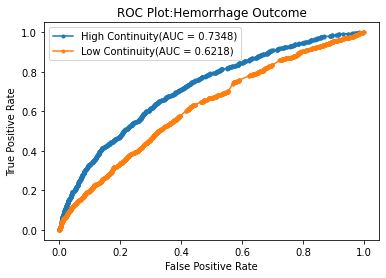

In [16]:
#plt.plot(gpop_fpr,gpop_tpr , marker ='.', label='General Population (AUC = %0.4f)' % 0.7543)
plt.plot(high_fpr, high_tpr, marker='.', label='High Continuity(AUC = %0.4f)' % 0.7348)
plt.plot(low_fpr, low_tpr, marker='.', label='Low Continuity(AUC = %0.4f)' % 0.6218)
#plt.plot(gpop_fpr, gpop_tpr, marker='.', label='General Continuity(AUC = %0.4f)' % 0.6767)

# Title
plt.title('ROC Plot:Hemorrhage Outcome')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [10]:
for values in prediction_high_gpop:
    print(values[1])

0.3955064259617502
0.3190551336941481
0.36685863448996414
0.42488007742388906
0.4837017563812906
0.28105217753085454
0.4986368291770763
0.2769687896080815
0.5606666300660784
0.36867211456252313
0.5861818871175176
0.41645899006400255
0.2892495999796421
0.6882061286417587
0.6268730661146186
0.2231627497065347
0.26789022625624737
0.5446709578255734
0.2849114604093668
0.7429370716493924
0.3215917350948715
0.44211923658165736
0.3427197237199845
0.10273739674123473
0.4016081995567317
0.4162138544363346
0.25135416399502186
0.23372217427303585
0.46523620636471646
0.5818959050831629
0.43125096269554
0.44639065675887163
0.6518868937171195
0.4419905981890716
0.5238672705650343
0.47973481602463014
0.40300203466779383
0.7929825519969513
0.5490727536332324
0.3354874911429094
0.4405243692387226
0.38529978430868456
0.6758181992098848
0.5225360635210154
0.1775790629843808
0.6969402529264664
0.8407892157456921
0.38551935579456353
0.6100228554286345
0.5561623188582375
0.27895613360520766
0.47954995723866

0.24944464068799133
0.476531204713842
0.30916725561701003
0.1467092186256431
0.7838396431147424
0.40772492531132604
0.43685790989647993
0.40136648306983663
0.3062121532613401
0.495013137706558
0.16364194861454995
0.38189596393655945
0.4217232777659824
0.4792215605478748
0.6833696559603144
0.1179291582551307
0.30498296345236464
0.765177705562357
0.2909622787475082
0.781967900690653
0.2814786411941737
0.5005684037502602
0.3603172088326802
0.45133113846884004
0.47685316427665636
0.5620361972313206
0.8673701950233843
0.2962154656326575
0.2649708885110967
0.25202734055150516
0.3829556263658349
0.3081809441742033
0.6267865846440159
0.31044239231507426
0.17252302750516157
0.44095325175138855
0.2215197713999558
0.237214655983432
0.3440391887669148
0.6543947143082843
0.3794545285419083
0.7233924119849088
0.4626631359643849
0.18183245975615767
0.6221778373834161
0.27536075697225365
0.24077205199378815
0.3581719355321191
0.36546090398062303
0.3331048483618346
0.2752684470340284
0.1418024485883215

0.4232551080186441
0.44095325175138855
0.5859814840410438
0.22630295252264693
0.5886016399327778
0.6184352282712232
0.692265610298519
0.2768065537987067
0.15158887573887314
0.3652888679495332
0.28946674884536416
0.2128835685858467
0.583248322403901
0.4559453311994809
0.6000473595973058
0.49742815606166857
0.33651270912951936
0.45860543873607085
0.8723001715154197
0.4175156400351242
0.4950143183973305
0.35561334238282083
0.6676025790187841
0.753964172788223
0.23148528540505808
0.7719366812975341
0.3755466653504768
0.2108962101535692
0.43370160706637434
0.3498971756612841
0.484830655620205
0.6428219887444823
0.4944653645523431
0.33696810859473947
0.32369663476734956
0.8555449168309639
0.5063075893654996
0.4699166603251787
0.36238955948994445
0.8174769956388431
0.5316596801261078
0.43685790989647993
0.2555989518867635
0.35750539658985175
0.639662008207861
0.5205006592490807
0.35539136417433126
0.41468694434525466
0.6991232925634652
0.5276741291521271
0.5428234187538999
0.7047213428542837


0.751724476132958
0.07105573093029657
0.8429091785012849
0.3206340246089337
0.5944342798518658
0.5054000943868214
0.706447716777275
0.5419282797260279
0.6709710156977526
0.34717971974828005
0.6623783241232788
0.5504709766663263
0.36420649889565027
0.6736321381041032
0.3833780905681111
0.5680434889128763
0.4784967437741809
0.7227677181426582
0.41629519895083883
0.2741821875042824
0.43877363824365334
0.6339943274407415
0.5753665000592605
0.35340123866410417
0.3813487860144837
0.4227428793871176
0.46128129735734963
0.506778936976749
0.2621599767914791
0.8029684289493614
0.3574353430327118
0.9302180323009724
0.1866200571552514
0.2572177029583154
0.4948786832214519
0.2584019962775154
0.21829929146357463
0.5402014481191516
0.30500327679984296
0.3632402502549572
0.2797093439793219
0.4293468743672956
0.6267710335075164
0.47577348576192885
0.3323433475349312
0.7964808281787668
0.5066724417719979
0.8065428223964499
0.24923478349458025
0.6680237780571961
0.40190158697747297
0.3483511843495276
0.4

0.16970892207823202
0.3056590302024861
0.3882540743473174
0.22628361522654195
0.3992802024598573
0.2742148736500908
0.2546487929523242
0.8493997642459818
0.6203856297802106
0.22474418091025325
0.3349304912500363
0.5063075893654996
0.5933162968614646
0.4255498588486588
0.6623608873150901
0.22973483574033446
0.11066573538817041
0.3017878110496443
0.2998334440956
0.3649509482985561
0.47070014142169675
0.9355633352370517
0.21562794402452168
0.5436614329353193
0.5418066157174279
0.2139835245433508
0.4329544002702795
0.40147072959428237
0.4217098292966356
0.30962811204593726
0.3699004663265792
0.36144191862927433
0.6449189118262328
0.5655610609136887
0.3584567749515427
0.2552255147839634
0.21701126535352752
0.6974891840119773
0.7581660746445161
0.4942295194679131
0.4936254407943695
0.571287570197002
0.32997296902177253
0.21446278635902555
0.518133666022265
0.4207228358131779
0.24185849786403518
0.6198396330693914
0.5204696795154724
0.15620380838489076
0.2702566842420004
0.13262268849301695
0

0.8844487503056765
0.32197320215039676
0.5612903609262685
0.1874571038760988
0.18622691992196888
0.36144191862927433
0.28600735472716166
0.24577942145487786
0.7426519197229314
0.5555895802969366
0.5337869161846861
0.47680115856589217
0.6834909445900249
0.7077893618645184
0.5617447513631995
0.6077766917415109
0.5704234093084515
0.434995936394965
0.32597561065283814
0.3604015548481676
0.4551556444206099
0.47912485207693567
0.8163877565031464
0.6508152401678485
0.3374432797309798
0.7387969399793752
0.5535730781971536
0.4831439007344989
0.35477560403631786
0.2948322902815187
0.1795041795822688
0.5437214559405268
0.44601372521819144
0.2973845170468472
0.7992201227253151
0.6175237972035662
0.5787543198908944
0.4176366241176093
0.3703890656423234
0.26766120433661483
0.3927262223765713
0.47597253112496496
0.3993351758273251
0.4275535568093274
0.3020469253565216
0.48425195663356957
0.4274666443027926
0.4046300970469371
0.33432666396807487
0.7326082549600034
0.18320663835472692
0.294234236749172

0.6641451113195753
0.268929130417297
0.6000878968862992
0.46185391814524035
0.551076376573758
0.5208397776002145
0.687246527842778
0.631438221791519
0.4600322804020198
0.6537139209972624
0.370079699599923
0.7314810816714441
0.518916811095785
0.6833898574204434
0.43599651641469994
0.676700784459068
0.6248378929190421
0.36621140712225986
0.2728070705807232
0.5086608570256241
0.4763767298355308
0.5506251936994698
0.20550030496485935
0.4671223386289069
0.36144191862927433
0.3120897518804676
0.29091267318430347
0.5133733371313068
0.6940330839368863
0.8058523018704387
0.7052070645130947
0.3700509095135547
0.4986225794849391
0.4598410306624964
0.7078493171868122
0.6035793398650816
0.3497264971473505
0.5083233241023473
0.4468264782542279
0.5530198719866938
0.26657563493334513
0.5353977049237788
0.4424615133440859
0.3703556405384658
0.44095325175138855
0.7395221477740457
0.3924534153597743
0.3789971072581581
0.31901101954191863
0.15934064590154373
0.5820655469996546
0.5300951405568034
0.7237506

0.3045394151213111
0.2508796412861359
0.7413540129595204
0.48149309347868746
0.25827878038275787
0.2411912858417802
0.8937542482791938
0.7154364300535482
0.5309168545270236
0.26193334729252943
0.575031924349384
0.6201674107123625
0.5781752179204722
0.47103586358743016
0.2323548806984733
0.6623182844301019
0.46535704563044333
0.3578689758995755
0.7636476490430953
0.670270116585594
0.8743243789265608
0.5458442303046326
0.23694167956893739
0.2854293957945074
0.28943271031862083
0.19601480335084412
0.39647064922136593
0.09255546793688751
0.6038341655526083
0.4068342813543171
0.5362237420706084
0.22916275024526722
0.281004641109286
0.2833959476829579
0.5854473050134634
0.3238281833643541
0.7465266073444534
0.40727131605989597
0.17954112915214013
0.5963294127815048
0.23261793841228776
0.3873678657645195
0.21889303573110494
0.6119704161905029
0.27865186366025463
0.20224179724601066
0.3068876658291037
0.34252642211552914
0.27711782503168375
0.6408381968467113
0.48744563570449473
0.371293429733

0.2506557316170014
0.16598251980302614
0.325204621791175
0.48886713028737333
0.8195962435793006
0.35988902518995863
0.3473930559148158
0.255984967136032
0.2797093439793219
0.5153438548753987
0.18829097886581964
0.44980274695251143
0.31965488402134884
0.3643480822921115
0.3979933373816964
0.2880171080714586
0.09729068291339807
0.28007435610954784
0.1668919715849794
0.34060752714682635
0.38202252857081576
0.44095325175138855
0.14015768179818297
0.2775498050680635
0.5425963849633589
0.43749236801709707
0.2981659519766528
0.36395634022659673
0.49102049517539187
0.3929523469663095
0.6236439191255683
0.5974546716171647
0.4958567125164656
0.3760122412818885
0.23206253713458813
0.21752710214861345
0.2644140834638292
0.5049489967792454
0.33836370669822907
0.43193263251367875
0.3158465077271098
0.4151424315390895
0.260234313838322
0.23716826292972662
0.2565171252173063
0.3320076659062042
0.35655777471680117
0.4844961702507926
0.4259631173963098
0.530682880697051
0.8916235219648834
0.286007354727

0.3528142701202753
0.43312573654605496
0.44186129094068377
0.4031692646702085
0.5271715122381838
0.5431530352331263
0.41775988819051435
0.9006528451242581
0.6007760582963199
0.43779959019947357
0.43685790989647993
0.8019089167023098
0.29563048535261843
0.20906501995138518
0.572438583011204
0.2864989087532406
0.25347369779988294
0.4232905980094711
0.6040150468935342
0.34380012167183593
0.6521620345843632
0.3981754595076678
0.5650716178111426
0.45979358179108043
0.2303109541085415
0.35761265632278355
0.5485853412107696
0.4673195224949408
0.7121177800279106
0.40813896160056484
0.3199436703618545
0.70676120405205
0.3836166037415884
0.2705039853711269
0.6595511869288812
0.4676935014142836
0.413002848592342
0.12666705759875962
0.3217868620691085
0.22320444586304278
0.29772704058597854
0.722196892099137
0.2330340182171609
0.34514500039432133
0.09646950908073074
0.11818067504101161
0.2115030116827587
0.2913800009184378
0.21288669954757788
0.37248654365223854
0.28600735472716166
0.5728386359744

0.26893360236434954
0.38093373345162357
0.48660224310436034
0.6929778138190996
0.4808448450907041
0.5467099606940407
0.5189276059047369
0.1901497632899673
0.36731649758129287
0.27371999586331414
0.3758257857878307
0.30458037789278075
0.38712341697657093
0.5049776085494937
0.6618199564010007
0.9639608610358443
0.884653939680722
0.26985825914161277
0.2815110741965045
0.3094223757118421
0.401394407775554
0.37987035431940086
0.4565878498111325
0.2772793155892541
0.31353816756838765
0.1753453270880475
0.6495953729458233
0.6328707414220993
0.5556430729341757
0.45916297362367037
0.6240735443000726
0.7434530289763609
0.13578496837918297
0.25234127190967326
0.2928420230036954
0.46814034146769784
0.8489392320895497
0.6060689903328841
0.37242044567777416
0.18751250661487154
0.17820680399107228
0.2452532464611628
0.9227189897108126
0.2544205104587826
0.5929805439538942
0.4673505901290991
0.38715459154346593
0.2942342367491724
0.2860246249352483
0.49350345518264205
0.40203690076662457
0.63185634827

0.4365041884246667
0.6794480438866135
0.6328560125582948
0.6906227516380412
0.8281708110694403
0.5227982698177029
0.3853087225005805
0.8043228880265698
0.24329090981046977
0.48630835197157246
0.3818031419175801
0.7302382501226924
0.7671368801166298
0.28600735472716166
0.45056385522071096
0.8179880238225432
0.5503434022614417
0.4188642357119624
0.36312122926288726
0.28600735472716166
0.2949419073729567
0.3107071947667337
0.8214135670653225
0.7169050258717948
0.4869077116235031
0.32059597016504515
0.7850228078204853
0.749912240520107
0.3724251304714318
0.5931989953472251
0.4442210869885729
0.28600735472716166
0.36621140712225986
0.35761265632278355
0.6832559753297777
0.7303895462850465
0.6079837197915245
0.1570562195804394
0.6106814646011589
0.39806529901762944
0.523361514738461
0.21480893936412332
0.5771363806772825
0.7461058248583634
0.7700076151204538
0.8221193440200701
0.7606077142798079
0.7969817966566975
0.5195008523588917
0.8789887327395268
0.7974120916006792
0.38848820447652244
0

In [12]:
for values in out_validation_hemorrhage_gpop:
    print(values)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
